In [8]:
import numpy as np
from pandas.io.parsers import read_csv
import matplotlib.pyplot as plt

In [9]:
df = read_csv("data2.csv", header=None)
VARS_IN = ["tamaño en pies cuadrados", "numero de habitaciones"]
VAR_OUT = "precio"
print(df)
data = df.to_numpy()
print(data.shape)

       0  1       2
0   2104  3  399900
1   1600  3  329900
2   2400  3  369000
3   1416  2  232000
4   3000  4  539900
5   1985  4  299900
6   1534  3  314900
7   1427  3  198999
8   1380  3  212000
9   1494  3  242500
10  1940  4  239999
11  2000  3  347000
12  1890  3  329999
13  4478  5  699900
14  1268  3  259900
15  2300  4  449900
16  1320  2  299900
17  1236  3  199900
18  2609  4  499998
19  3031  4  599000
20  1767  3  252900
21  1888  2  255000
22  1604  3  242900
23  1962  4  259900
24  3890  3  573900
25  1100  3  249900
26  1458  3  464500
27  2526  3  469000
28  2200  3  475000
29  2637  3  299900
30  1839  2  349900
31  1000  1  169900
32  2040  4  314900
33  3137  3  579900
34  1811  4  285900
35  1437  3  249900
36  1239  3  229900
37  2132  4  345000
38  4215  4  549000
39  2162  4  287000
40  1664  2  368500
41  2238  3  329900
42  2567  4  314000
43  1200  3  299000
44   852  2  179900
45  1852  4  299900
46  1203  3  239500
(47, 3)


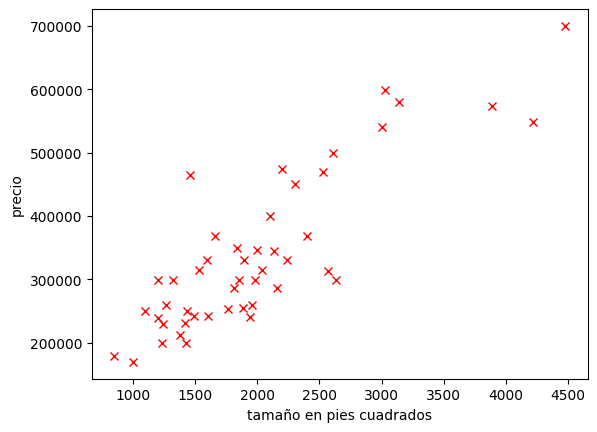

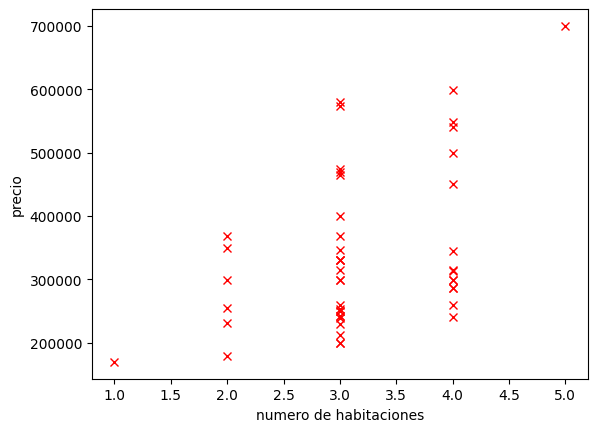

In [10]:
for i in range(len(VARS_IN)):
    plt.plot(data[:,i], data[:,-1], "x",color="red")
    plt.xlabel(VARS_IN[i])
    plt.ylabel(VAR_OUT)
    plt.show()

In [11]:
def normalize(matrix):
    mu = np.mean(matrix, axis=0)
    sigma = np.std(matrix, axis=0)
    print(mu, sigma)

    matrix_normalize = np.zeros(matrix.shape, dtype="float64")
    i = 0
    for med, dev in zip(mu, sigma):
        matrix_normalize[:,i] = (matrix[:,i] - med )/ dev
        i+=1

    return mu, sigma, matrix_normalize

In [12]:
mu, sigma, data_normalize = normalize(data)

[2.00068085e+03 3.17021277e+00 3.40412660e+05] [7.86202619e+02 7.52842809e-01 1.23702536e+05]


In [13]:
X = data_normalize[:,:-1] #variables de entrada
y = data_normalize[:,-1]

In [14]:
def linear_regression(x_v, w, b):
    return np.dot(x_v, w) + b

In [15]:
def cost_fun(x_i, y, w, b):
    y_pred = linear_regression(x_i, w, b)
    error = y_pred - y
    return sum(np.square(error)) / (2*len(x_i))

# Descenso del gradiente

In [32]:
m, n = X.shape
w = np.zeros(X[0].shape, dtype="float64")
b = 0
NUMBER_OF_ITS = 1000
ALFA = float(0.01)

In [41]:
print("Start: ")
print("w =", w, "b =", b)
print("Coste =", cost_fun(X, y, w, b))

for _ in range(NUMBER_OF_ITS):

    y_pred = linear_regression(X, w, b)
    error = y_pred - y

    w-= ALFA * np.dot(X.T, error)/ m

    b -= ALFA * sum(error) / m

print("\nFinal : ")
print("w =",w, "b =", b)
print("Coste =", cost_fun(X, y, w, b))

Start: 
w = [ 0.88476515 -0.05317798] b = -7.426092837585807e-17
Coste = 0.13352749098585492

Final : 
w = [ 0.88476598 -0.05317881] b = -7.491052695409625e-17
Coste = 0.1335274909855429


In [18]:
print(mu, sigma)

[2.00068085e+03 3.17021277e+00 3.40412660e+05] [7.86202619e+02 7.52842809e-01 1.23702536e+05]


In [36]:
def calculate(mu, sigma, x_in):
    norm_x_in = (x_in - mu[:-1])/ sigma[:-1] # Normalizar

    norm_out = linear_regression(norm_x_in, w, b)

    return norm_out * sigma[-1] + mu[-1] # Desnormalizar

In [40]:
x_in = np.array([1650, 3])

print(calculate(mu, sigma, x_in))


293081.48724808113
